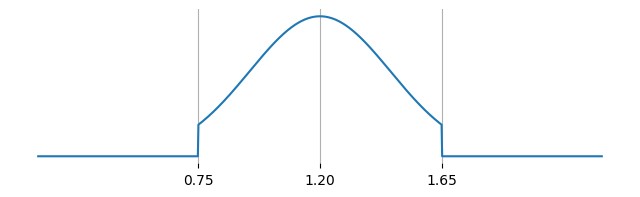

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Define parameters
mu = 1.2  # Mean
sigma = 0.26  # Standard deviation
trim = 0.45  # Trimming value on each side

# Define the range for trimming
lower_bound = mu - trim
upper_bound = mu + trim

# Generate data points for the normal distribution
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
pdf_values = norm.pdf(x, loc=mu, scale=sigma)

# Trim the distribution
trimmed_pdf_values = np.where((x >= lower_bound) & (x <= upper_bound), pdf_values, 0)

# Normalize the PDF values
normalization_factor = np.trapz(trimmed_pdf_values, x)
trimmed_pdf_values /= normalization_factor

# Plotting
plt.figure(figsize=(8, 2))
plt.plot(x, trimmed_pdf_values, label='Trimmed Normal Distribution (Normalized)')
plt.grid(True)
plt.xticks([0.75, 1.2, 1.65])
plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.savefig("speed_distribution.pdf")


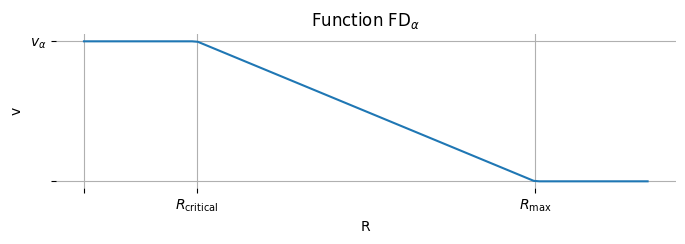

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def FD_alpha(R, v_alpha, R_max, R_critical):
    if R < R_critical:
        return v_alpha
    elif R_critical <= R < R_max:
        return v_alpha * (1 - (R - R_critical) / (R_max - R_critical))
    else:
        return 0

# Define the parameters
v_alpha = 10
R_max = 20
R_critical = 5

# Generate some sample data
R_values = np.linspace(0, R_max + 5, 100)
FD_values = [FD_alpha(R, v_alpha, R_max, R_critical) for R in R_values]

# Plot the function
plt.figure(figsize=(8, 2))
plt.plot(R_values, FD_values, label=r'$\mathrm{FD}_\alpha(R; v_\alpha,R_{\mathrm{max}}, R_{\mathrm{critical}})$')
plt.xlabel('R')
plt.ylabel('v')
plt.title(r'Function FD$_\alpha$')

plt.grid(True)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.xticks([0, 5, 20], ["", r'$R_{\mathrm{critical}}$', r'$R_{\mathrm{max}}$'])
plt.yticks([0, 10], ["", r'$v_\alpha$'])

plt.savefig("fd-transport.pdf")


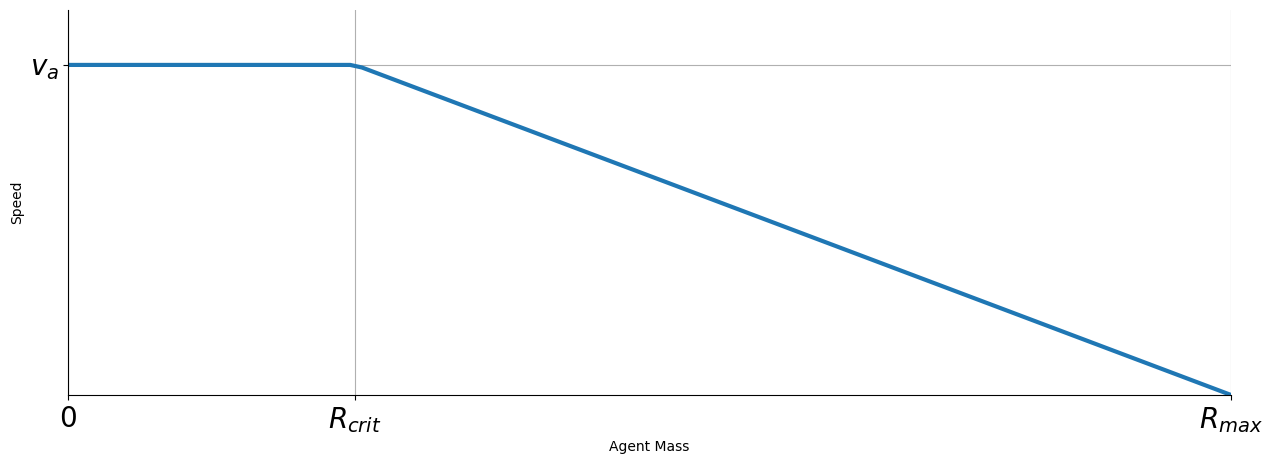

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function for the fundamental diagram
def v_rho_transport(ρ, v_opt, ρ_crit, ρ_max):
    v = np.zeros_like(ρ)  # Initialize velocity array with zeros
    v[ρ < ρ_crit] = v_opt  # Set velocity to v_opt for ρ < ρ_crit
    v[(ρ_crit < ρ) & (ρ < ρ_max)] = v_opt * (1 - (ρ[(ρ_crit < ρ) & (ρ < ρ_max)] - ρ_crit) / (ρ_max - ρ_crit))  # Set velocity to v_opt * (1 - (ρ - ρ_crit) / (ρ_max - ρ_crit)) for ρ_crit < ρ < ρ_max
    return v

# Define parameters
v_opt = 1.2  # Optimal velocity
ρ_crit = 3.7  # Critical density
ρ_max = 15  # Maximum density

# Generate density range
ρ_range = np.linspace(0, ρ_max, 100)

# Calculate velocity values using the defined function
v_transport = v_rho_transport(ρ_range, v_opt, ρ_crit, ρ_max)

# Plotting
plt.figure(figsize=(15, 5))

# Plot v(ρ) using the defined function
plt.plot(ρ_range, v_transport, linewidth=3)
plt.xlabel('Agent Mass')
plt.ylabel('Speed')
plt.grid(True)

plt.xticks([0, ρ_crit, ρ_max], ["0", '$R_{crit}$', '$R_{max}$'], size=20)
plt.yticks([v_opt], ['$v_{a}$'], size=20)
plt.ylim(0, v_opt + 0.2)
plt.xlim(0, ρ_max)

# Remove the rectangular frame around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
# plt.gca().spines['left'].set_visible(False)

# Show plot
plt.savefig("fd-transport.pdf")
plt.show()

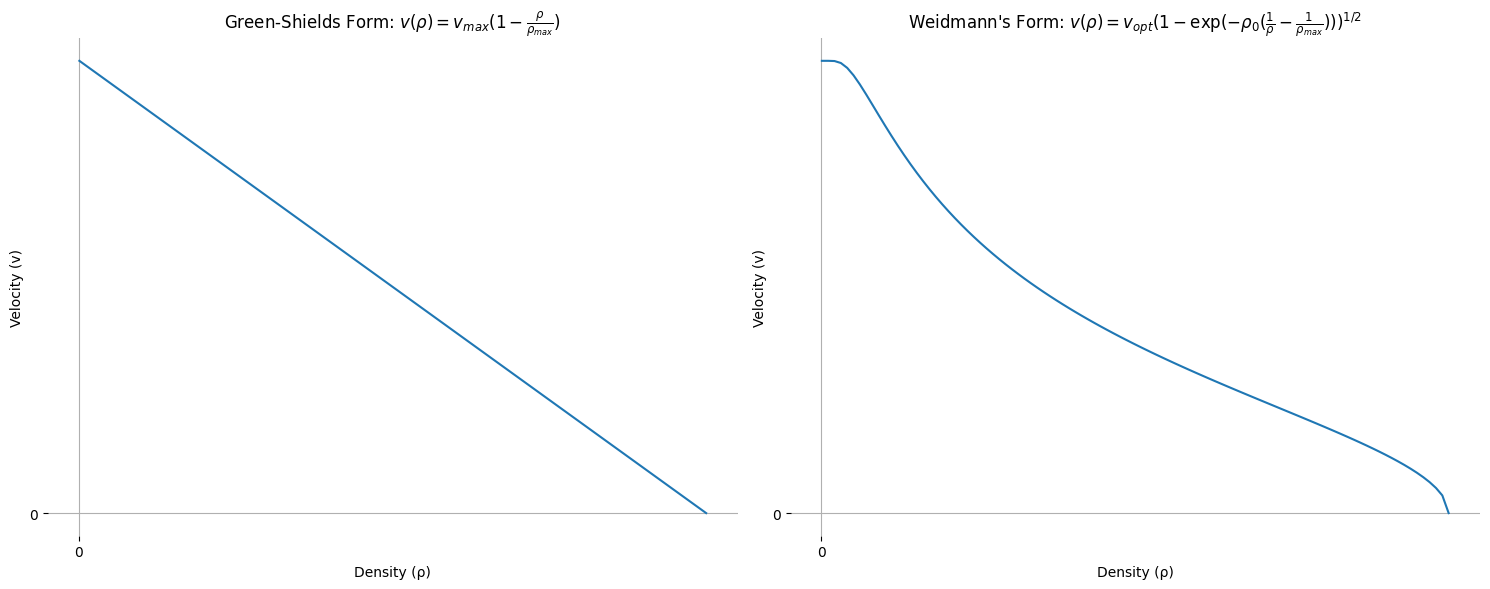

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define the Green-Shields function for velocity-density relationship
def v_rho_greenshields(ρ, v_max, ρ_max):
    return v_max * (1 - ρ / ρ_max)

# Define the Weidmann's function for velocity-density relationship
def v_rho_weidmann(ρ, v_opt, ρ_0, ρ_max):
    return v_opt * (1 - np.exp(-ρ_0 * (1/ρ - 1/ρ_max)))**(1/2)

# Define parameters for Green-Shields
v_max_gs = 30  # Maximum velocity for Green-Shields
ρ_max_gs = 100  # Maximum density for Green-Shields

# Define parameters for Weidmann's
v_opt_w = 30  # Optimal velocity for Weidmann's
ρ_max_w = 100  # Maximum density for Weidmann's
ρ_0_w = 15  # Exponential decay parameter for Weidmann's

# Generate density range for both models
ρ_range = np.linspace(0.1, max(ρ_max_gs, ρ_max_w), 100)  # Start from 0.1 to avoid division by zero

# Calculate velocity values for Green-Shields
v_greenshields = v_rho_greenshields(ρ_range, v_max_gs, ρ_max_gs)

# Calculate velocity values for Weidmann's
v_weidmann = v_rho_weidmann(ρ_range, v_opt_w, ρ_0_w, ρ_max_w)

# Plotting
plt.figure(figsize=(15, 6))

# Plot v(ρ) using Green-Shields function
plt.subplot(1, 2, 1, frameon=False)
plt.plot(ρ_range, v_greenshields)
plt.xlabel('Density (ρ)')
plt.ylabel('Velocity (v)')
plt.title('Green-Shields Form: $v(ρ) = v_{max} (1 - \\frac{ρ}{ρ_{max}})$')
plt.grid(True)
plt.xticks([0])
plt.yticks([0])

# Plot v(ρ) using Weidmann's function
plt.subplot(1, 2, 2, frameon=False)
plt.plot(ρ_range, v_weidmann)
plt.xlabel('Density (ρ)')
plt.ylabel('Velocity (v)')
plt.title('Weidmann\'s Form: $v(ρ) = v_{opt} (1 - \exp(-ρ_0 (\\frac{1}{ρ} - \\frac{1}{ρ_{max}})))^{1/2}$')
plt.grid(True)
plt.xticks([0])
plt.yticks([0])

# Show plot
plt.tight_layout()
plt.savefig("fd-examples.pdf")
plt.show()


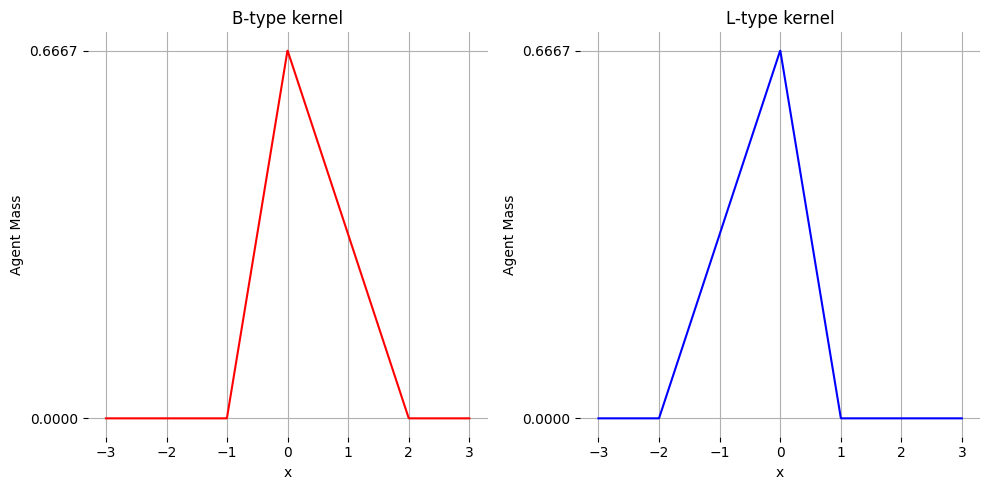

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def asymmetric_triangular_kernel(x, c1, c2):
    left_mask = np.logical_and(x >= -c1, x < 0)
    right_mask = np.logical_and(x >= 0, x <= c2)
    h = 2 / (c1 + c2)
    
    tmp1 = h * (abs(x[left_mask])) / c1
    tmp2 = h * (abs(x[right_mask])) / c2
    
    kernel = np.zeros_like(x)
    kernel[left_mask] = tmp1[::-1]
    kernel[right_mask] = tmp2[::-1]
    
    return kernel

# Generate x values
x = np.linspace(-3, 3, 1000)

# Define parameters for the asymmetric triangular kernel
c1 = 1.0  # Left slope coefficient
c2 = 2.0  # Right slope coefficient

# Calculate the kernel values
kernel = asymmetric_triangular_kernel(x, c1, c2)
kernel2 = asymmetric_triangular_kernel(x, c2, c1)

# Create figure and axes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot first kernel in the first subplot
axs[0].plot(x, kernel, label='Kernel 1', color='red')
axs[0].set_xlabel('x')
axs[0].set_ylabel('Agent Mass')
axs[0].set_title('B-type kernel')
axs[0].grid(True)
axs[0].set_yticks([0, 2 / (c1 + c2)])

# Hide spines for the first subplot
for spine in axs[0].spines.values():
    spine.set_visible(False)

# Plot second kernel in the second subplot
axs[1].plot(x, kernel2, label='Kernel 2', color='blue')
axs[1].set_xlabel('x')
axs[1].set_ylabel('Agent Mass')
axs[1].set_title('L-type kernel')
axs[1].grid(True)
axs[1].set_yticks([0, 2 / (c1 + c2)])

# Hide spines for the second subplot
for spine in axs[1].spines.values():
    spine.set_visible(False)

# Adjust layout
plt.tight_layout()

plt.savefig("kernels.pdf")
# Show plot
plt.show()


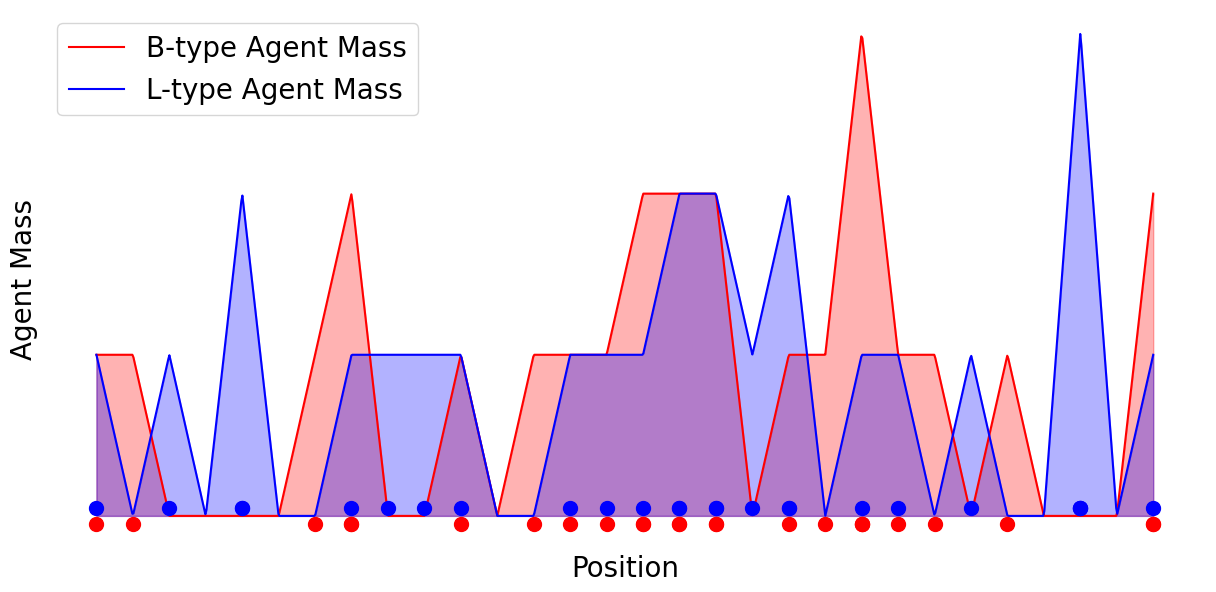

In [6]:
import numpy as np
import matplotlib.pyplot as plt

COUNT = 25
DIST = 30

# Vygenerujeme náhodná data pro oba profily
centers1 = np.random.randint(0, 30, size=COUNT)
centers2 = np.random.randint(0, 30, size=COUNT)

def triangular_kernel(x, centers):
    return np.sum([np.where(np.abs(x - center) <= 1, 1 - np.abs(x - center), 0) for center in centers])

# Vytvoření bodů pro vykreslení hustotních profilů
x = np.linspace(min(min(centers1), min(centers2)), max(max(centers1), max(centers2)), 1000)

y1 = np.array([triangular_kernel(b, centers1) for b in x])
y2 = np.array([triangular_kernel(b, centers2) for b in x])

# Vykreslení grafu
plt.figure(figsize=(15, 7))

# První hustotní profil
plt.plot(x, y1, label='B-type Agent Mass', color='r')
plt.fill_between(x, y1, alpha=0.3, color='r')  # Vyplnění plochy pod křivkou

# Druhý hustotní profil
plt.plot(x, y2, label='L-type Agent Mass', color='b')
plt.fill_between(x, y2, alpha=0.3, color='b')  # Vyplnění plochy pod křivkou

plt.xticks([])
plt.yticks([])

plt.xlabel('Position', size=20)
plt.ylabel('Agent Mass', size=20)
plt.legend(fontsize=20)
plt.grid(False)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

for point in centers1:
    plt.plot(point, -0.05, marker='o', markersize=10, color='r', alpha=1)
    
for point in centers2:
    plt.plot(point, 0.05, marker='o', markersize=10, color='b', alpha=1)

plt.savefig("mass-profile.pdf")
plt.show()


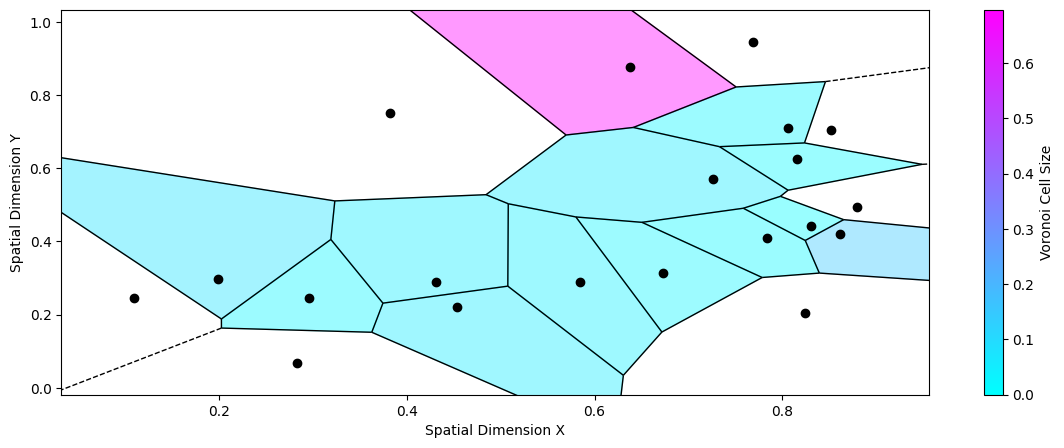

In [7]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Generate some random points
points = np.random.rand(20, 2)

# Compute Voronoi diagram
vor = Voronoi(points)

fig, ax = plt.subplots(figsize=(14, 5))

# Plot Voronoi diagram with colored regions representing cell sizes
voronoi_plot_2d(vor, show_vertices=False, show_points=False, ax=ax)

# Calculate areas of Voronoi cells
areas = []
for region_index in range(len(vor.regions)):
    if not -1 in vor.regions[region_index]:
        polygon = [vor.vertices[i] for i in vor.regions[region_index]]
        # Shoelace formula to calculate area of a polygon
        x = [p[0] for p in polygon]
        y = [p[1] for p in polygon]
        area = 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))
        areas.append(area)
    else:
        areas.append(0)  # Assign 0 area for regions that are unbounded

# Normalize the areas to use as color intensities
norm = Normalize(vmin=min(areas), vmax=max(areas))
mapper = ScalarMappable(norm=norm, cmap='cool')

# Assign colors to regions based on cell sizes
for region_index in range(len(vor.regions)):
    if not -1 in vor.regions[region_index]:
        polygon = [vor.vertices[i] for i in vor.regions[region_index]]
        plt.fill(*zip(*polygon), color=mapper.to_rgba(areas[region_index]), alpha=0.4)
  
# Highlight the input points
plt.plot(points[:,0], points[:,1], 'ko')

# Add colorbar
cbar = plt.colorbar(mapper, ax=ax)
cbar.set_label('Voronoi Cell Size')

plt.xlabel('Spatial Dimension X')
plt.ylabel('Spatial Dimension Y')
plt.grid(False)
plt.savefig("voronoi.pdf")
plt.show()


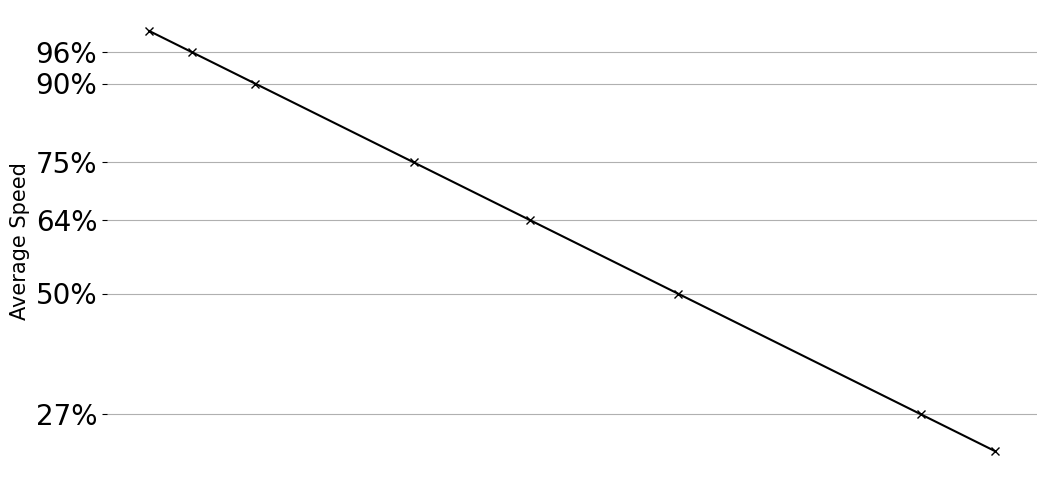

In [8]:
import matplotlib.pyplot as plt

# Define the percentages and their corresponding x-values
percentages = [20, 27, 50, 64, 75, 90, 96, 100][::-1]
x_values = [0, 4, 10, 25, 36, 50, 73, 80]

# Plot the line
plt.figure(figsize=(12, 6))
plt.plot(x_values, percentages, marker='x', linestyle='-', color="black")

# Add labels and title
plt.xticks([])
plt.yticks(percentages[1:-1], [f"{x}%" for x in percentages if x != 100 and x != 20], size=20)
plt.ylabel('Average Speed', size= 15)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Show the plot
plt.grid(True)
plt.savefig("empirical.pdf")
plt.show()


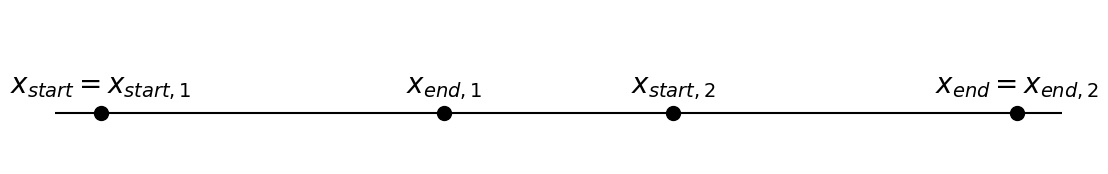

In [9]:
import matplotlib.pyplot as plt

# Define the points and their labels
points = [0, 150, 250, 400]
labels = ["$x_{start} = x_{start, 1}$", "$x_{end, 1}$", "$x_{start, 2}$", "$x_{end} = x_{end, 2}$"]

plt.figure(figsize=(13, 2))

# Create a horizontal line plot
plt.axhline(y=1, color='black', linestyle='-')

# Add points with labels
for point, label in zip(points, labels):
    plt.plot(point, 1, marker='.', markersize=20, color='black')
    plt.text(point, 1.1, label, verticalalignment='bottom', horizontalalignment='center', size=20)

plt.ylim(0.5, 2)

plt.xticks([])
plt.yticks([], [])


# Show the plot
plt.grid(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.savefig("boundaries.pdf")

plt.show()


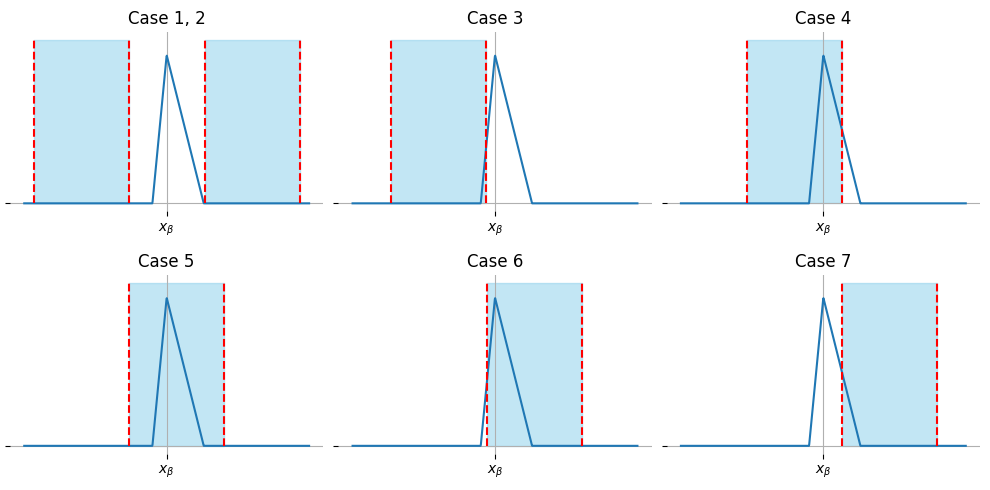

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def asymmetric_triangular_kernel(x, c1, c2):
    left_mask = np.logical_and(x >= -c1, x < 0)
    right_mask = np.logical_and(x >= 0, x <= c2)
    h = 2 / (c1 + c2)
    
    tmp1 = h * (abs(x[left_mask])) / c1
    tmp2 = h * (abs(x[right_mask])) / c2
    
    kernel = np.zeros_like(x)
    kernel[left_mask] = tmp1[::-1]
    kernel[right_mask] = tmp2[::-1]
    
    return kernel

# Generate x values
x = np.linspace(-7.5, 7.5, 1000)
ints = [(-7, -2), (-5.5, -0.5), (-4, 1), (-2, 3), (-0.4, 4.6), (1, 6)]        

c1 = 0.75  # Left slope coefficient
c2 = 1.95  # Right slope coefficient
kernel = asymmetric_triangular_kernel(x, c1, c2)

# Create figure and axes
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

for i in range(2):
    for j in range(3):
        axs[i, j].plot(x, kernel)
        axs[i, j].set_title(f'Case {i*3 + j + 2 if i + j != 0 else "1, 2"}')
        axs[i, j].grid(True)
        axs[i, j].set_yticks([0], "")
        axs[i, j].set_xticks([0], [r"$x_{\beta}$"])
        for spine in axs[i, j].spines.values():
            spine.set_visible(False)
            
        fr, to = ints[i*3 + j]
        xfill = np.linspace(fr, to, 100)
        yfill = np.array([2.2 / (c1 + c2) for _ in range(100)])
        axs[i, j].vlines([fr, to], 0, 2.2 / (c1 + c2), colors="red", linestyle='--')
        axs[i, j].fill_between(xfill, yfill, 0, where=(yfill > 0), color='skyblue', alpha=0.5)
        # yfill = asymmetric_triangular_kernel(xfill, c1, c2)
        # axs[i, j].plot(xfill, yfill, color="r")

axs[0, 0].vlines([2, 7], 0, 2.2 / (c1 + c2), colors="red", linestyle='--')
xfill = np.linspace(2, 7, 100)
yfill = np.array([2.2 / (c1 + c2) for _ in range(100)])
axs[0, 0].fill_between(xfill, yfill, 0, where=(yfill > 0), color='skyblue', alpha=0.5)

plt.tight_layout()
plt.savefig("overlay.pdf")
plt.show()


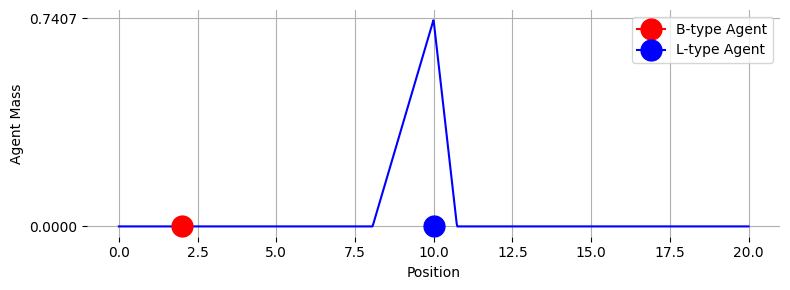

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def asymmetric_triangular_kernel(x, c1, c2, pos=10):
    left_mask = np.logical_and(x >= -c1 + 10, x < 0 + 10)
    right_mask = np.logical_and(x >= 0 + 10, x <= c2 + 10)
    h = 2 / (c1 + c2)
    
    tmp1 = h * (np.abs(pos - x[left_mask])) / c1
    tmp2 = h * (np.abs(pos - x[right_mask])) / c2
    
    kernel = np.zeros_like(x)
    kernel[left_mask] = tmp1[::-1]
    kernel[right_mask] = tmp2[::-1]
    
    return kernel

# Generate x values
x = np.linspace(0, 20, 1000)

# Define parameters for the asymmetric triangular kernel
c1 = 0.75  # Left slope coefficient
c2 = 1.95  # Right slope coefficient

# Calculate the kernel values
kernel = asymmetric_triangular_kernel(x, c2, c1)

# Create figure and axes
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

# Plot first kernel in the first subplot
ax.plot(x, kernel, color='blue')
ax.set_xlabel('Position')
ax.set_ylabel('Agent Mass')
ax.grid(True)
ax.set_yticks([0, 2 / (c1 + c2)])

# Hide spines for the first subplot
for spine in ax.spines.values():
    spine.set_visible(False)
    
ax.plot(2, -0, marker='o', markersize=15, color='r', alpha=1, label="B-type Agent")
    
ax.plot(10, 0, marker='o', markersize=15, color='b', alpha=1, label="L-type Agent")

ax.legend()

# Adjust layout
plt.tight_layout()

plt.savefig("experiment1.pdf")
# Show plot
plt.show()


In [ ]:
def Aplot1_1(file, vels1, pos1, vels2, pos2):
    fig, ax = plt.subplots(1, 1, figsize=(10, 3))
    ax.grid(True)
    ax.plot(pos1, vels1)
    ax.set_xlabel('distance [m]')
    ax.set_ylabel('speed [m/s]')
    ax.set_yticks([x for x in np.arange(0, max(max(vels1, vels2)) + 0.2, 0.2)])
    plt.savefig("diraq-1-1-example.pdf")
    plt.show()
    
sim_file = '../simulation'
param_dir = '../params/'
log_dir = 'log/analysis/'
params = [
    '1dyn-1static',
    ]
kernels = [
    "diraq",
]
for param in params:
    process = subprocess.Popen([ sim_file, '1', param_dir + param, "1" ])
    process.wait()
    for kername in kernels: 
        filename = log_dir + param + '/0'
        Aplot1_1(f'{filename}/{kername}', * read1_1(f'{filename}/{kername}'))


\lambda_(x) &= 0.0014814815 x^1 + 0.0000021728 x^2 + -0.0000000042 x^3 + 0.0000000000 x^4 \\ 911.1111111111118

\lambda_(x) &= 0.0056888889 x^1 + -0.0000104296 x^2 + 0.0000000070 x^3 + -0.0000000000 x^4 \\ 906.6666666666683

\lambda_(x) &= 0.0014222222 x^1 + -0.0000018963 x^2 + 0.0000000032 x^3 + -0.0000000000 x^4 \\ 906.6666666666674


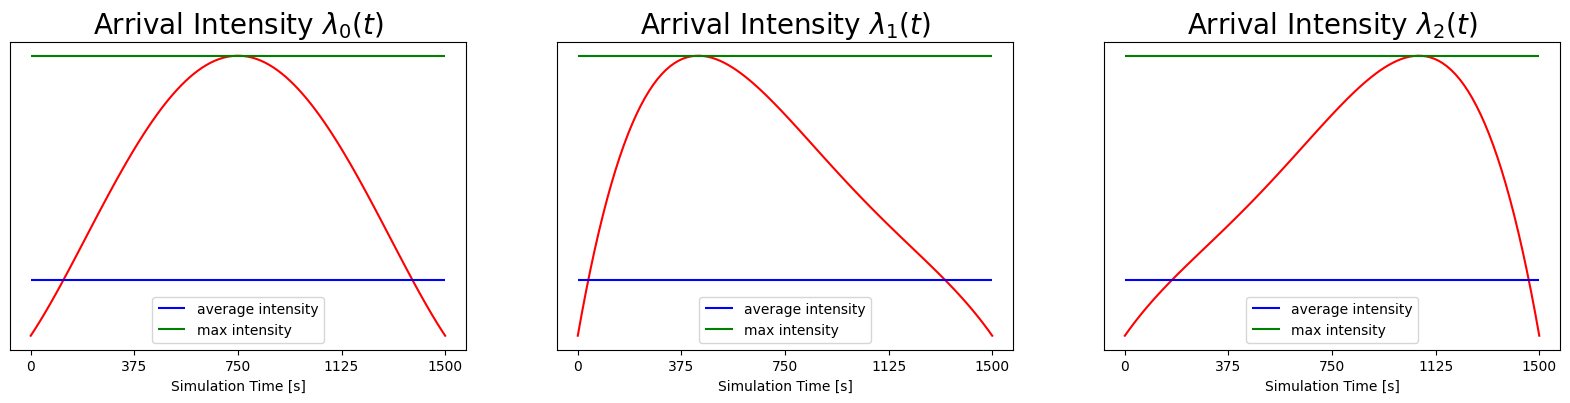

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

t_max = 1500

def PolynomialCoeffs (val):
    return np.array([val**i for i in range(0, 5)])

def Polynomial(arr, coeffs):
    return np.array([np.sum([k * x**i for i, k in enumerate(coeffs)]) for x in arr ])

def Polynomial1(x, coeffs):
    return np.sum([k * x**i for i, k in enumerate(coeffs)])

def Riem(polynom, lo, hi):
    return np.sum([hi**(i + 1) * c / (i + 1) for i, c in enumerate(polynom)]) - np.sum([lo**(i + 1) * c / (i + 1) for i, c in enumerate(polynom)])

def GetMax(coeffs):
    pass

tt = np.array([0, t_max/4, t_max/2, 3 * t_max/4, t_max])

A = []
for time in tt:
    A = np.vstack((A, PolynomialCoeffs(time))) if len(A) != 0 else np.array([PolynomialCoeffs(time)])

bb = np.array([
    np.array([0, 2/3, 1, 2/3, 0]),
    np.array([0, 1, 4/5, 2/5, 0]),
    np.array([0, 2/5, 4/5, 1, 0])
    ]
)

ll = np.array( [
    0.2,
    0.3,
    0.4, 
    0.5, 
    0.55, 
    0.6, 
    0.65, 
    0.7
] )

ps = dict() # lambdas
for lam in ll:
    ps[lam] = dict() # shapes

x_values = np.linspace(0, t_max, 100)

PRINT = True

fig, ax = plt.subplots(1, 3, figsize=(20, 4))

for numm, lam in enumerate(ll[:1]):
    for num, b in enumerate(bb[:]):
        coeffs = np.linalg.solve(A, b)
        # scale = (lam * t_max) / Riem(coeffs, 0, t_max)
        # coeffs *= scale
        ps[lam][num] = coeffs
        
        result = minimize_scalar(lambda x: -Polynomial1(x, ps[lam][num]), bounds=(0, t_max), method='bounded')
        max_value = -result.fun  # hodnota funkce v maximu

        text = f"Arrival Intensity $\lambda_{num} (t)$"
        ttttt = f"\n\lambda_(x) &= "
        for i, k in enumerate(coeffs):
            ttttt += f"{k:.10f} x^{i}" + (" + " if i != len(coeffs) - 1 else " \\\\") if i != 0 else ''
            
        print(ttttt, Riem(coeffs, 0, t_max))

        y_values = Polynomial(x_values, coeffs)

        # Vykreslení grafu
        ax[num].plot(x_values, y_values, color="r")
        ax[num].set_title(text, size=20)
        ax[num].hlines([lam], 0, t_max, colors=["blue"], label="average intensity")
        ax[num].hlines([max_value], 0, t_max, colors=["green"], label="max intensity")
        ax[num].set_xticks(tt)
        ax[num].set_xlabel('Simulation Time [s]')
        # ax[num].set_ylabel('Arrival Intensity [ped/s]')
        ax[num].set_yticks([])
        
        ax[num].legend(loc=8)
plt.savefig(f"intensity-illustration.pdf")
plt.show()